In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import BDay

from MA_PREDICTOR.car import calculate_car
from MA_PREDICTOR.car import calculate_ar
from MA_PREDICTOR.global_vars import STOCKS
from MA_PREDICTOR.data import add_car

In [401]:
data = pd.read_csv('../MA_PREDICTOR/data/ma_data.csv',
                   parse_dates=['announcement_date'])[['id', 'announcement_date', 'acquiror_ticker']]

# Deep dive: single observations

In [395]:
# Generating random samples
samples = [data.iloc[n] for n in np.random.randint(len(data), size=10)]

# Getting abnormal return for specified timeframe
abnormal_returns = []
for sample in samples:
    if sample.acquiror_ticker in STOCKS:
        abnormal_returns.append(calculate_ar(sample.acquiror_ticker, sample.announcement_date))

UnboundLocalError: local variable 'start_day' referenced before assignment

In [398]:
samples

[id                            3532632020
 announcement_date    2020-03-19 00:00:00
 acquiror_ticker                     DRNE
 Name: 25634, dtype: object,
 id                            3760078020
 announcement_date    2021-06-21 00:00:00
 acquiror_ticker                     OBTX
 Name: 27081, dtype: object,
 id                            2430324020
 announcement_date    2012-02-07 00:00:00
 acquiror_ticker                      FRM
 Name: 12679, dtype: object,
 id                            3791878020
 announcement_date    2021-08-26 00:00:00
 acquiror_ticker                     WTRH
 Name: 27263, dtype: object,
 id                            2209241020
 announcement_date    2010-05-08 00:00:00
 acquiror_ticker                     FSYS
 Name: 9370, dtype: object,
 id                            2097391020
 announcement_date    2009-06-08 00:00:00
 acquiror_ticker                       HK
 Name: 7891, dtype: object,
 id                            3101133020
 announcement_date    2017-05-

In [397]:
abnormal_returns

[Date
 2021-06-18   -0.064340
 2021-06-21    0.025692
 2021-06-22    0.008091
 Name: abnormal_return, dtype: float64,
 Date
 2021-08-25   -0.026414
 2021-08-26   -0.035497
 2021-08-27    0.103261
 Name: abnormal_return, dtype: float64,
 Date
 2017-05-04   -0.011064
 2017-05-05    0.011801
 2017-05-08   -0.005251
 Name: abnormal_return, dtype: float64,
 Date
 2006-07-07   -0.082818
 2006-07-10   -0.014830
 2006-07-11   -0.004361
 Name: abnormal_return, dtype: float64]

In [403]:
data[data.id == 2127042020]

,id,announcement_date,acquiror_ticker
8240,2127042020,2009-11-11,RECV


In [406]:
STOCKS['RECV']['2009-10-01':'2009-11-30']

,Open,Close
Date,,
2009-10-07,5.21,5.21
2009-10-08,5.21,5.21
2009-10-09,5.21,5.21
2009-10-20,5.21,5.21
2009-10-26,5.80,5.80
2009-11-20,5.01,5.01
2009-11-23,5.01,5.01
2009-11-25,5.02,5.02
2009-11-30,5.01,5.01


In [424]:
ann = datetime.strptime('2009-11-11', '%Y-%m-%d')

In [425]:
ann - BDay(2000)

Timestamp('2002-03-13 00:00:00')

In [412]:
# announcement day is by far not in range
calculate_ar('RECV', ann)

Date
2009-10-20    0.006239
2009-10-26    0.124961
2009-11-20   -0.132992
Name: abnormal_return, dtype: float64

IndexError: list index out of range

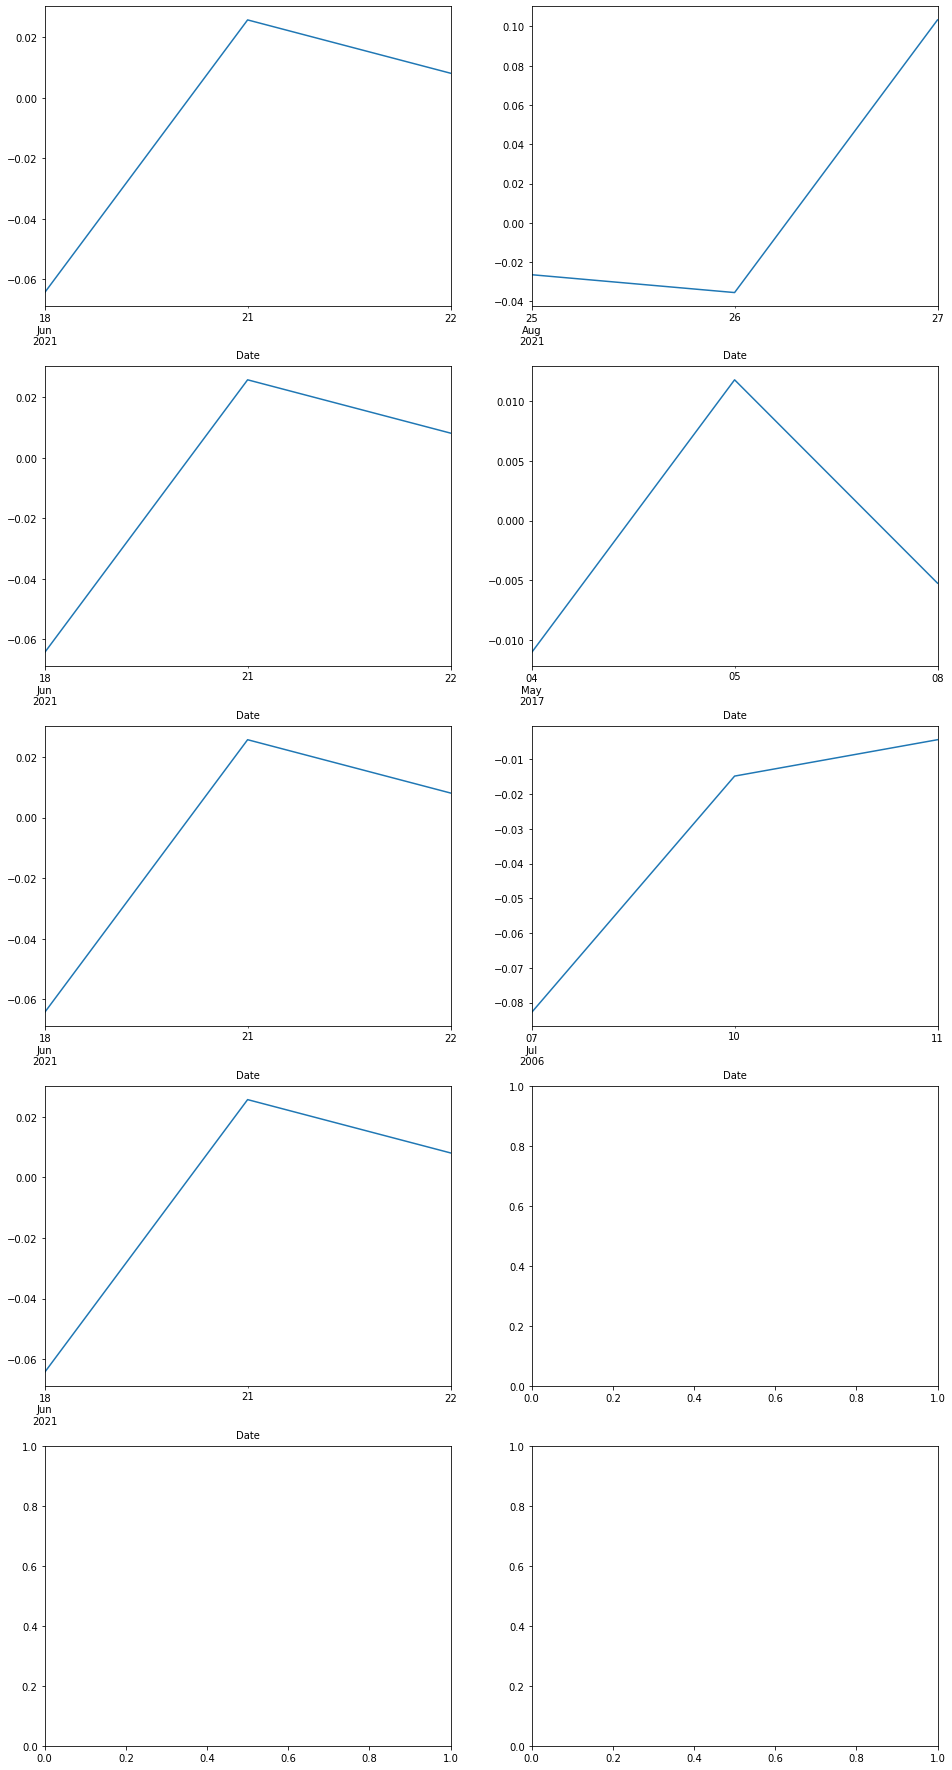

In [396]:
fig, axes = plt.subplots(5,2, figsize=(16, 32))

for x in range(5):
    for y in range(2):
        returns = abnormal_returns[x*y + y]
        returns.plot(ax=axes[x][y]);

# Dataset

In [11]:
def add_car(df):

    # if ticker not in dict put nan
    df['car'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)

In [12]:
def add_car_3(df):

    # if ticker not in dict put nan
    df['car_3'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date, 3, 3)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)

In [13]:
def add_car_5(df):

    # if ticker not in dict put nan
    df['car_5'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date, 5, 5)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)

In [115]:
data[data.id == 2161346020]

,id,announcement_date,acquiror_ticker
8694,2161346020,2010-04-03,WPI


In [136]:
STOCKS['WPI'].loc['2010-04-01':'2010-04-30']

,Open,Close
Date,,
2010-04-01,0.27,0.27
2010-04-05,0.26,0.27
2010-04-06,0.26,0.27
2010-04-14,0.28,0.28
2010-04-15,0.28,0.28
2010-04-21,0.27,0.26
2010-04-22,0.27,0.26
2010-04-23,0.26,0.26
2010-04-26,0.27,0.27


In [14]:
def add_car_10(df):

    # if ticker not in dict put nan
    df['car_10'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date, 10, 10)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)
    

In [15]:
add_car(data)

In [16]:
add_car_3(data)

In [17]:
add_car_5(data)

In [18]:
add_car_10(data)

In [20]:
data.std()

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_16967/2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


announcement_date    1692 days 23:58:49.942889696
car                                   1313.993729
car_3                                  1323.23541
car_5                                 1337.908961
car_10                                1439.034082
dtype: object

In [21]:
# Removing outliers

data = data[(data.car > -0.3) & (data.car < 0.3)]
data = data[(data.car_3 > -0.3) & (data.car_3 < 0.3)]
data = data[(data.car_5 > -0.3) & (data.car_5 < 0.3)]
data = data[(data.car_10 > -0.3) & (data.car_10 < 0.3)]

In [27]:
data.describe()

,car,car_3,car_5,car_10
count,17615.000000,17615.000000,17615.000000,17615.000000
mean,0.002637,0.003536,0.004035,0.006707
std,0.040770,0.053954,0.063260,0.080327
min,-0.299103,-0.294592,-0.299453,-0.299860
25%,-0.013622,-0.020684,-0.025919,-0.034288
50%,0.000270,0.000915,0.001154,0.003641
75%,0.017485,0.026692,0.034136,0.047952
max,0.274971,0.299202,0.292692,0.299782


/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_16967/2928176065.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(list(data.std()[-4:]));


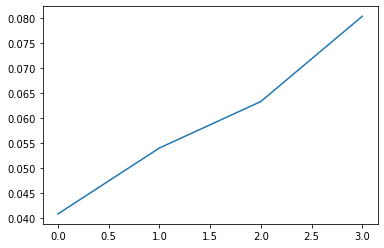

In [23]:
plt.plot(list(data.std()[-4:]));

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_16967/622446858.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(list(data.std()[-4:]));


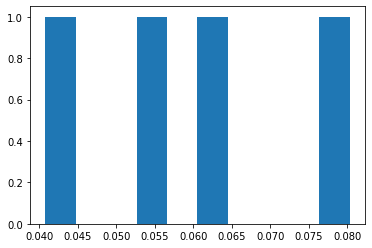

In [25]:
plt.hist(list(data.std()[-4:]));